In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Cargamos el Dataset
df = pd.read_csv("C:/Users/braya/OneDrive - Universidad Nacional Abierta y a Distancia/Desktop/UNAD/SEMESTRE 5/ANALISIS DE DATOS/TAREA 3/Anexo 4 - Dataset Red Wine Quality/winequality-red.csv")


In [3]:
#Traemos los primeros 5 datos de cada columna
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Presentamos la información general de cada columna, como el nombre, si hay valores nulos y el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Presentamos las principales estadisticas (suma, media, desviación estandar, minimo, cuartiles, maximo)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Determinamos cuantas columnas y filas hay
df.shape

(1599, 12)

# Procesamiento de datos

In [7]:
columnas = list(df.select_dtypes(include = ['object']).columns)
#Para seleccionar las columnas que tiene como tipo de dato object
columnas
#Confirmamos que no hay columnas con tipo de datos objeto

[]

In [8]:
#La funcion contruye un diccionario por columna done reemplaza las categorias por numeros
def procesar_datos():
    global df_proc
    df_proc = df.drop_duplicates() if df.duplicated().any() else df
    #Elimina datos duplicados
    df_proc = df.dropna() if df.isnull().values.any() else df
    #Elimina datos nulos
    
    df_proc['Range_quality'] = pd.cut(x = df['quality'],
                                  #Permite cortar la variable quality en los siguientes rangos
                                  bins=[0, 6.5, 10],
                                  #Le asigna los siguientes labels siendo 1 Bad y 2 Good
                                  labels = [1, 2]).astype(int)
    

In [9]:
procesar_datos()

df_proc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Range_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


Al no haber valores nulos ni duplicados, buscamos si hay valores atipicos analizando las graficas de barras e histogramas para cada columna

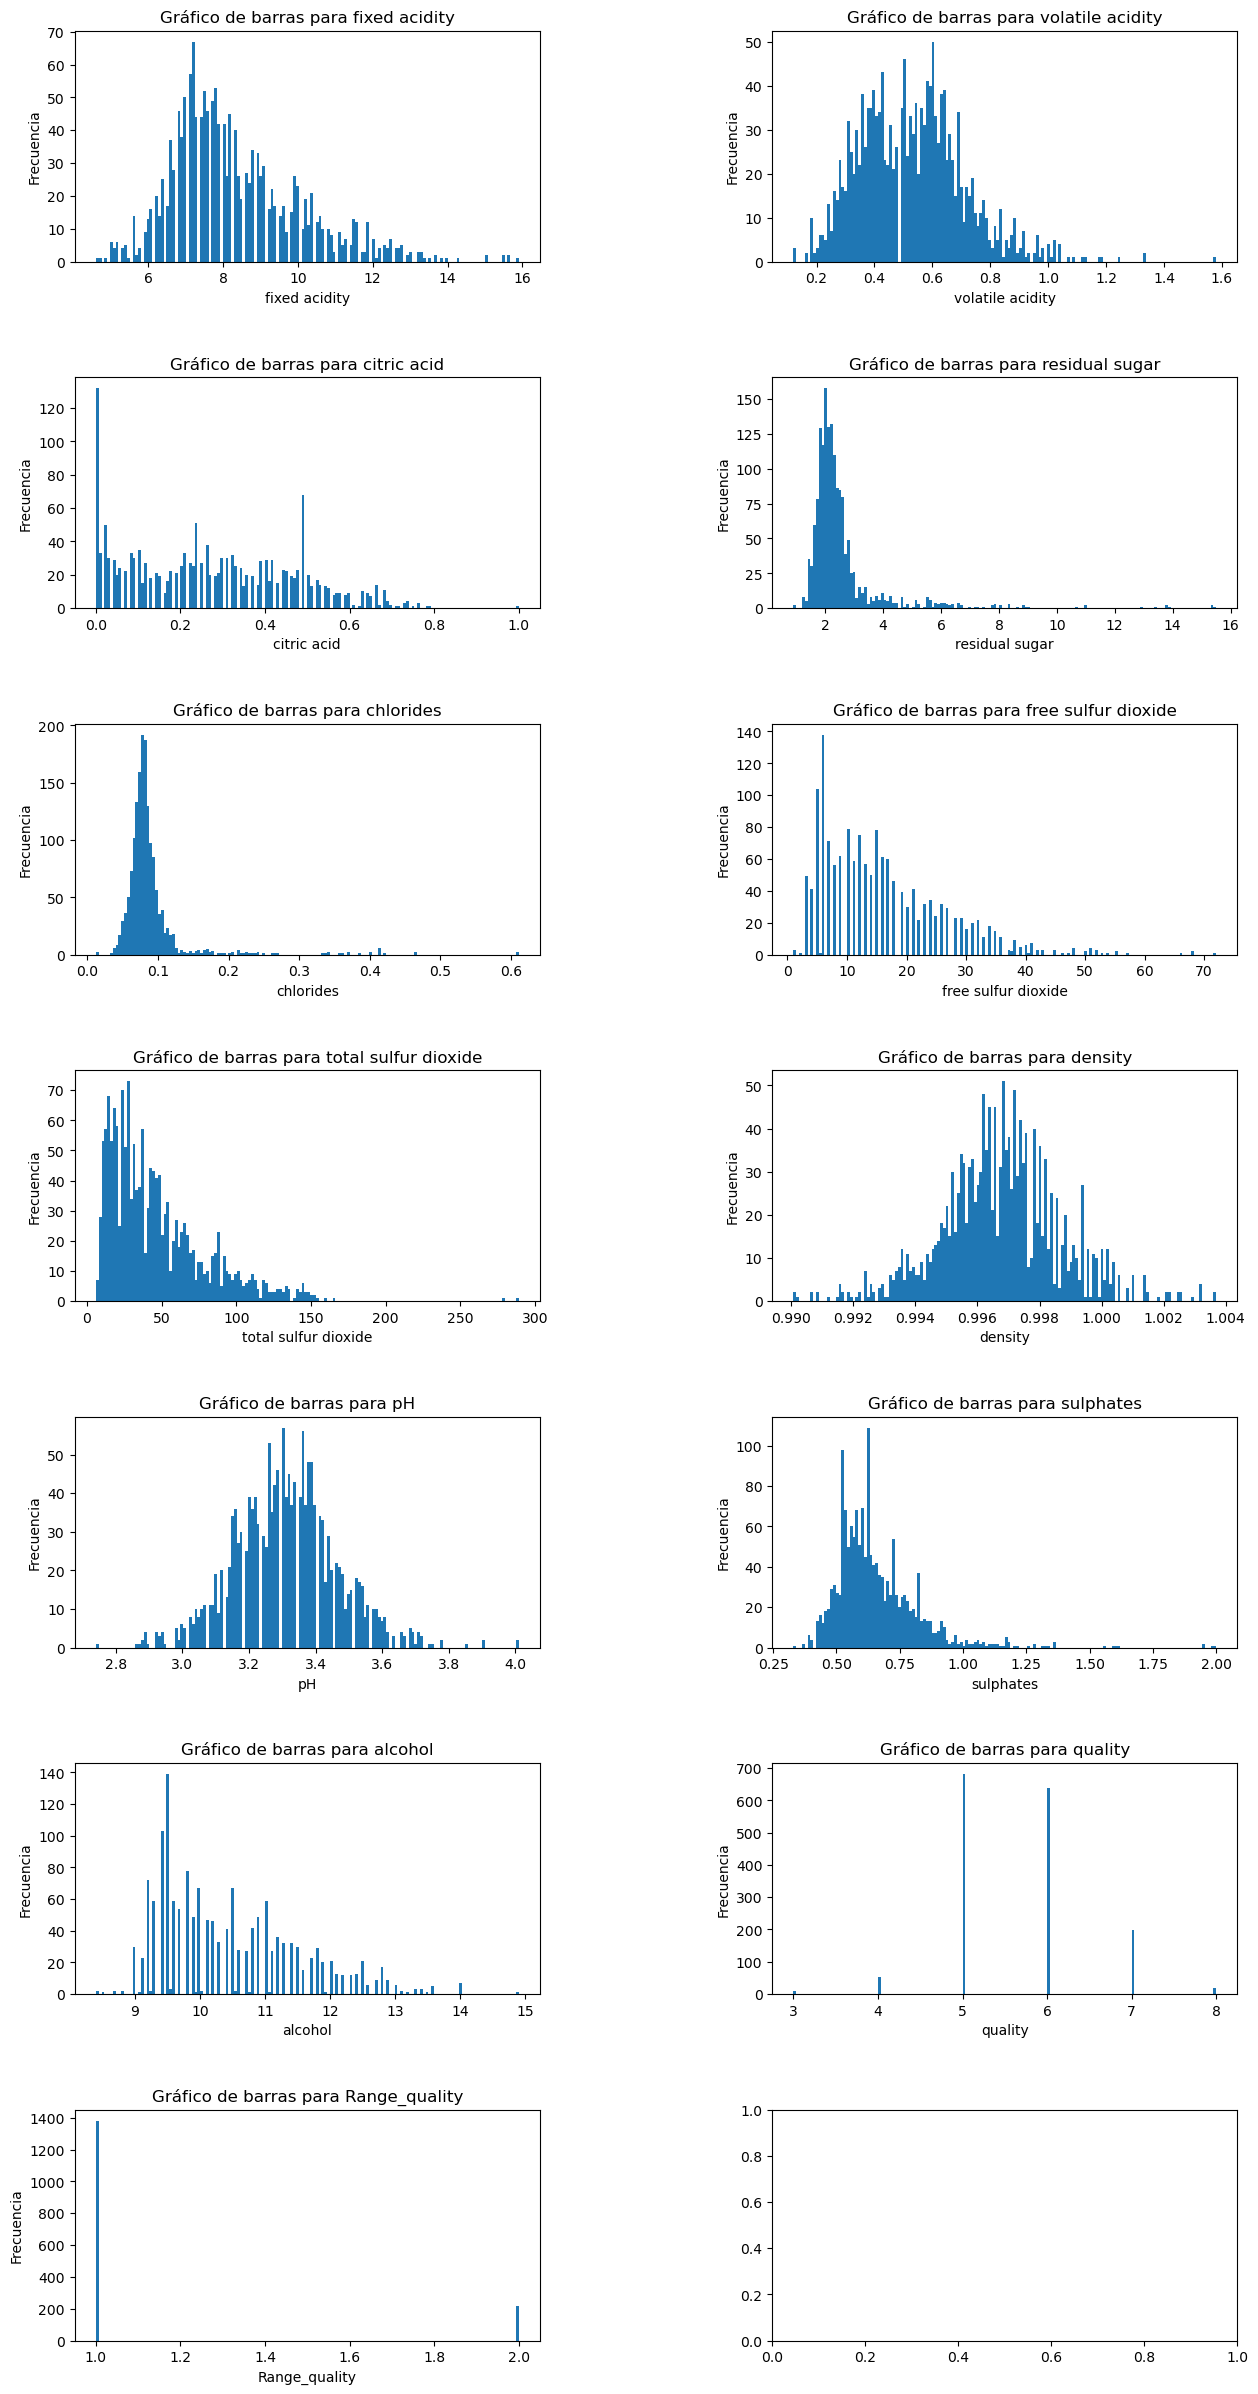

In [10]:
#Graficamos las variables numericas en graficos de histogramas
n_filas = 7
n_columnas = 2

fig, axs = plt.subplots(n_filas, n_columnas, figsize=(15, 30)) #Dentro de la misma figura creamos 14 graficas

plt.subplots_adjust(wspace=0.5, hspace=0.5)

columnas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Range_quality' ]

for i, columna in enumerate(columnas):
    # Calcular la posición del subplot
    fila = i // n_columnas
    col = i % n_columnas
    
    # Verificar si el índice está dentro del rango del número de columnas
    if i < len(columnas):
        
        # Crear el gráfico de histograma en el subplot correspondiente
        axs[fila, col].hist(df_proc[columna], bins=150)
        
        # Añadir títulos y etiquetas
        axs[fila, col].set_title(f'Gráfico de barras para {columna}')
        axs[fila, col].set_xlabel(columna)
        axs[fila, col].set_ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

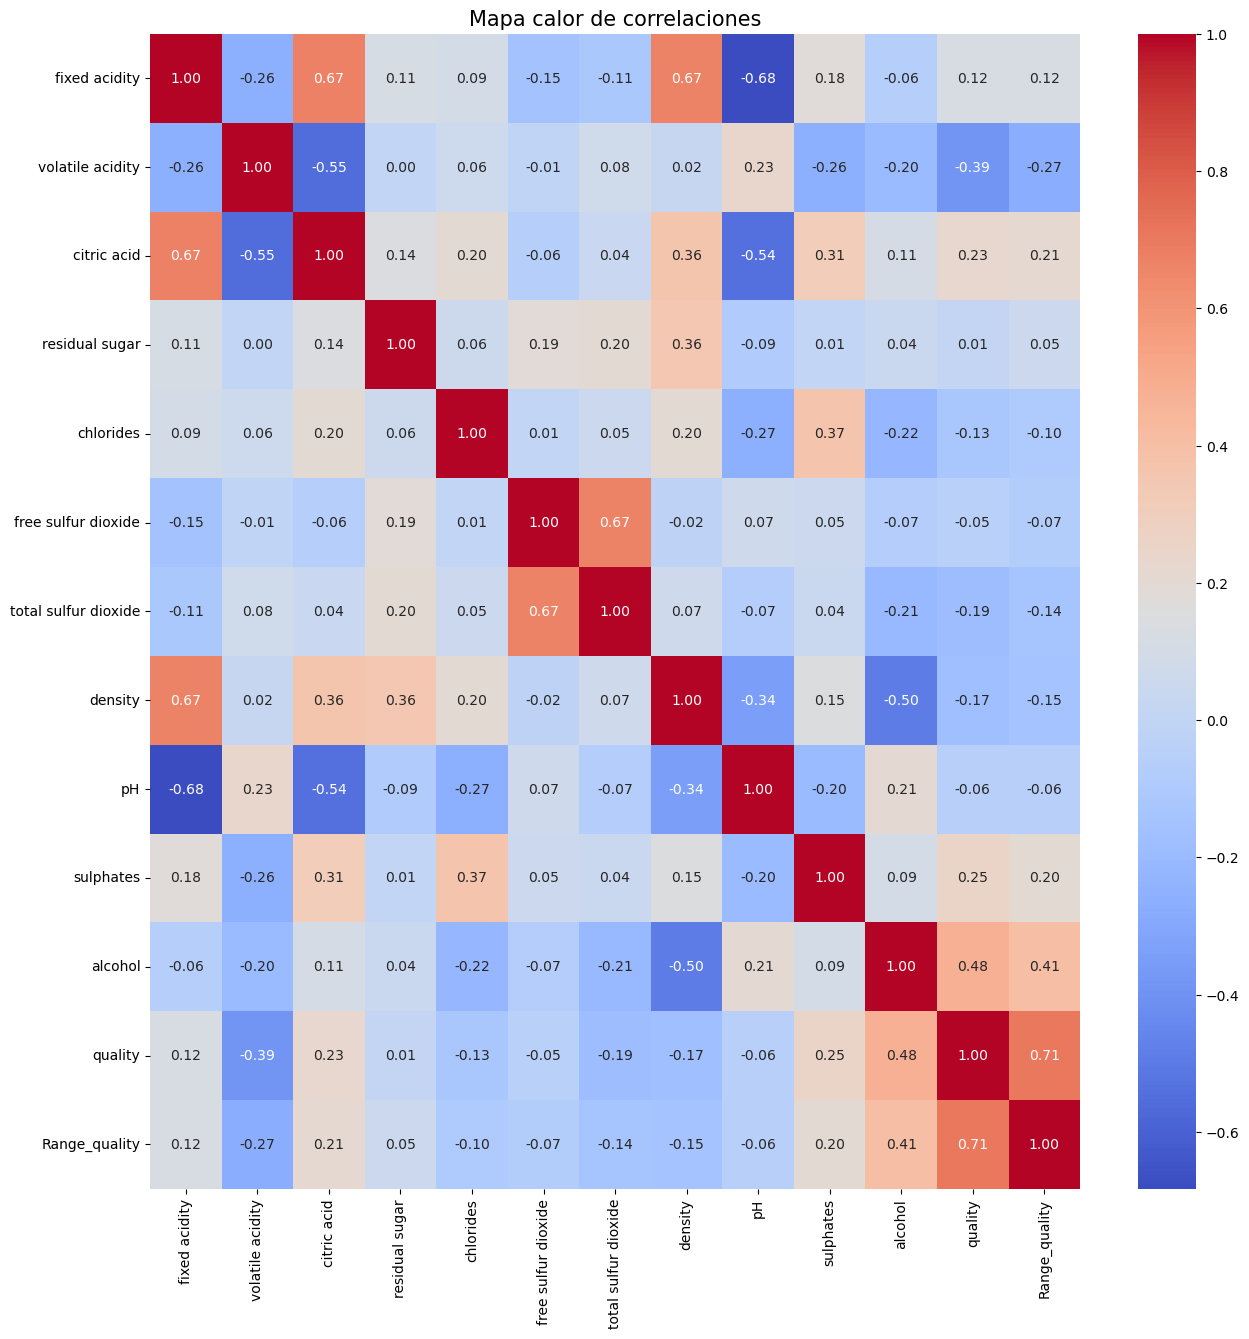

In [11]:
#Matriz de correlación
plt.figure(figsize = (15,15))
heatmap = sns.heatmap(df_proc.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
#Corr es el metodo de correlación entre variables
#annot permite visualizar anotaciones; Cmap permite darle color al mapa; fmt es la cantidad de decimales
plt.title('Mapa calor de correlaciones', fontsize = 15)
plt.show()

# Modelos de predicción

In [12]:
from sklearn.model_selection import train_test_split
#Divide las bases en datos de entrenamiento (aprender) y datos de prueba (pronosticar)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#Los anteriores son modelos diferentes de machine learning (modelos de clasificación)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
#Metricas de evaluación para saber cual de los 4 modelos funciona mejor

In [13]:
#Creamos una funcion para presentar los modelos y su evaluacion con las diferentes metricas
def crea_modelos():
    global df_proc, resultados
    y = df_proc['Range_quality']
    x = df_proc.drop(columns=['Range_quality', 'quality'])
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)
    
    #Diccionario de modelos
    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }
    
    #Diccionario de resultados para modelos de regresión
    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)

        #Metricas
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

In [14]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
    print(model)
    print(resultados['Accuracy'][i])
    print(resultados['Precision'][i])
    print(resultados['Recall'][i])
    print(resultados['F1-score'][i])
    print(resultados['AUC-ROC'][i])
    print('\n')
#Para mostrar los resultados de cada modelo

C:\Users\braya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión Logística
0.8645833333333334
0.8755458515283843
0.980440097799511
0.9250288350634371
0.8643892696029477


Árbol de Decisión
0.8854166666666666
0.9154929577464789
0.9535452322738386
0.934131736526946
0.7232514893763559


Random Forest
0.8958333333333334
0.901565995525727
0.9853300733496333
0.9415887850467289
0.9067116636247805


Naive Bayes
0.81875
0.9214659685863874
0.8606356968215159
0.8900126422250315
0.8352904714349667




In [15]:
#Funcion que grafica los resultados de cada metrica
def visualiza_resultados():
    global df_proc, resultados
    results_df = pd.DataFrame(resultados)
    #Transforma la lista de resultados en un DF
    results_df.set_index('Model', inplace=True)
    #Asignamos el indice al nombre del modelo

    # Transponer el DataFrame para facilitar la representación
    results_df = results_df.T
    #Se transpone el dataframe
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']
    #Cada modelo lleva un color diferente

    # Gráfico de barras agrupadas para cada métrica
    results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')
    plt.tight_layout()
    plt.show()

C:\Users\braya\AppData\Local\Temp\ipykernel_25872\910305495.py:16: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
C:\Users\braya\AppData\Local\Temp\ipykernel_25872\910305495.py:16: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)


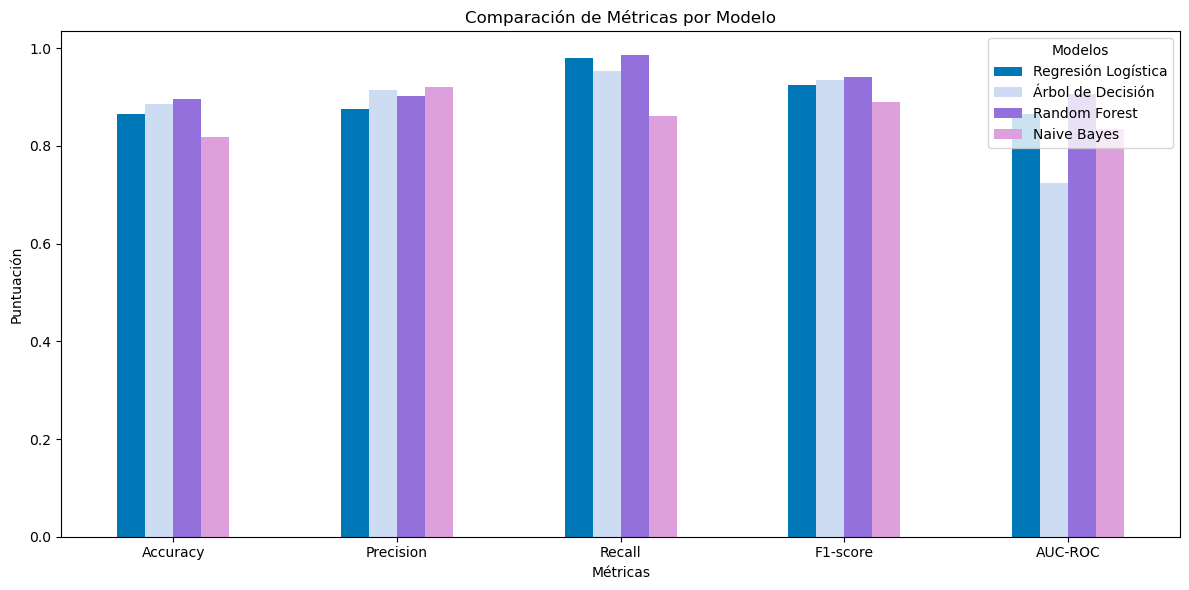

In [16]:
visualiza_resultados()
#Evaluamos cada modelo segun las metricas evaluadas